### In this notebook:
I look for opltimal hyperparameters  on a basis of results from previous search. (see notebook `xgb_random_search`). Feature matrix has selected variables after feature selection. See notebook `feature_selection`.

### About project:
Data is from Kaggle competiotion [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk). 

I implement an automated feature engineering approach with an open-source library [Featuretools](https://www.featuretools.com/). 


In [2]:
import xgboost as xgb 

import numpy as np
import pandas as pd
import time
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import gc

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
# Import data

In [5]:
dtrain1 = pd.read_csv('../data/feature_matrix1_selected.csv')
dtrain2 = pd.read_csv('../data/feature_matrix2_selected.csv')
dtrain3 = pd.read_csv('../data/feature_matrix3_selected.csv')

In [6]:
feature_matrix4_selected = pd.read_csv('../data/feature_matrix4_selected.csv')

dtrain4 = feature_matrix4_selected.loc[~feature_matrix4_selected['TARGET'].isnull()]

In [7]:
dtest = feature_matrix4_selected.loc[feature_matrix4_selected['TARGET'].isnull()]
dtest.drop('TARGET', axis=1, inplace=True)

In [8]:
dtrain = pd.concat([dtrain1, dtrain2, dtrain3, dtrain4], axis=0)

In [17]:
dtrain.shape

(307511, 1038)

In [18]:
dtest.shape

(48744, 1037)

In [19]:
id_col = 'SK_ID_CURR'
target_col = 'TARGET'

predictors = [x for x in dtrain.columns if x not in [id_col, target_col]]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(dtrain[predictors], dtrain[target_col], test_size=0.3, random_state=42, stratify=dtrain['TARGET'])

In [81]:
# To generate just sample for faster computation
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42, stratify=y_train)

In [12]:
#Import xgb params

In [23]:
with open('../data/best_params.pkl', mode='rb') as f:
    params = pickle.load(f)

In [24]:
params

{'subsample': 0.89,
 'reg_lambda': 0.12244897959183673,
 'reg_alpha': 0.1020408163265306,
 'n_estimators': 700,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.027271356526649162,
 'gamma': 0.32,
 'colsample_bytree': 0.72,
 'colsample_bylevel': 0.6799999999999999}

In [25]:
params['subsample'] = 0.8
params['reg_lambda'] = 1
params['reg_alpha'] = 0
params['n_estimators'] = 300
params['learning_rate'] = 0.10
params['max_depth'] = 5
params['min_child_weight'] = 1
params['gamma'] = 0
params['colsample_bytree'] = 0.8
params['colsample_bylevel'] = 0.8
params['scale_pos_weight'] = 1

In [26]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

#### Model

In [30]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [34]:
def fitmodel(model, X_train, y_train, X_test, y_test):
    
    start = time.time()
    
    clf.fit(X = X_train, y = y_train, early_stopping_rounds = 50,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        verbose=True)
    
    
    end = time.time()
    
    print('Computation took {} sec.'.format(round(end - start), 1))
    
    
    return clf


[0]	validation_0-auc:0.712575	validation_1-auc:0.704996
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.721399	validation_1-auc:0.71075
[2]	validation_0-auc:0.726755	validation_1-auc:0.715674
[3]	validation_0-auc:0.728521	validation_1-auc:0.717217
[4]	validation_0-auc:0.734193	validation_1-auc:0.722162
[5]	validation_0-auc:0.736773	validation_1-auc:0.724919
[6]	validation_0-auc:0.73687	validation_1-auc:0.725018
[7]	validation_0-auc:0.737739	validation_1-auc:0.725367
[8]	validation_0-auc:0.738608	validation_1-auc:0.725788
[9]	validation_0-auc:0.739516	validation_1-auc:0.726489
[10]	validation_0-auc:0.740946	validation_1-auc:0.727613
[11]	validation_0-auc:0.741896	validation_1-auc:0.728347
[12]	validation_0-auc:0.742181	validation_1-auc:0.728314
[13]	validation_0-auc:0.74489	validation_1-auc:0.730457
[14]	validation_0-auc:0.747544	validation_1-auc:0.732316
[

[141]	validation_0-auc:0.833258	validation_1-auc:0.775094
[142]	validation_0-auc:0.833649	validation_1-auc:0.775224
[143]	validation_0-auc:0.833963	validation_1-auc:0.775234
[144]	validation_0-auc:0.834245	validation_1-auc:0.77532
[145]	validation_0-auc:0.834594	validation_1-auc:0.775373
[146]	validation_0-auc:0.834955	validation_1-auc:0.775361
[147]	validation_0-auc:0.835308	validation_1-auc:0.775353
[148]	validation_0-auc:0.835741	validation_1-auc:0.775579
[149]	validation_0-auc:0.836043	validation_1-auc:0.7755
[150]	validation_0-auc:0.836323	validation_1-auc:0.775491
[151]	validation_0-auc:0.836671	validation_1-auc:0.775569
[152]	validation_0-auc:0.837114	validation_1-auc:0.775554
[153]	validation_0-auc:0.837412	validation_1-auc:0.775582
[154]	validation_0-auc:0.837675	validation_1-auc:0.775629
[155]	validation_0-auc:0.837979	validation_1-auc:0.775656
[156]	validation_0-auc:0.838361	validation_1-auc:0.775685
[157]	validation_0-auc:0.838741	validation_1-auc:0.775758
[158]	validation_

[283]	validation_0-auc:0.870748	validation_1-auc:0.777328
Stopping. Best iteration:
[233]	validation_0-auc:0.858803	validation_1-auc:0.777329



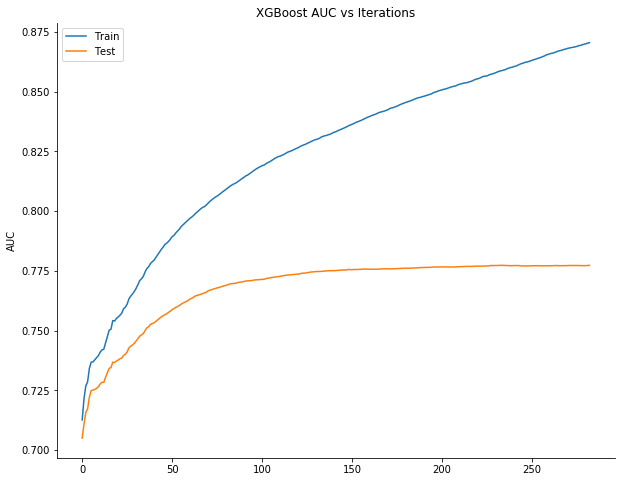

Computation took 943 sec.


In [34]:
fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [27]:
def draw_plot(model):
    
    results = model.evals_result()  
    
    # retrieve performance metrics
    epochs = len(results['validation_0']['auc'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(x_axis, results['validation_0']['auc'], label='Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='Test')
    ax.legend()


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.ylabel('AUC')
    plt.title('XGBoost AUC vs Iterations')
    plt.show()
    

In [ ]:
# Iteration 2

In [30]:
params['n_estimators'] = 230
params['max_depth'] = 3

In [31]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 230,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [32]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [35]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.685095	validation_1-auc:0.675761
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.711011	validation_1-auc:0.699309
[2]	validation_0-auc:0.711926	validation_1-auc:0.700781
[3]	validation_0-auc:0.713497	validation_1-auc:0.702058
[4]	validation_0-auc:0.718446	validation_1-auc:0.70674
[5]	validation_0-auc:0.722873	validation_1-auc:0.711662
[6]	validation_0-auc:0.724452	validation_1-auc:0.712413
[7]	validation_0-auc:0.727587	validation_1-auc:0.715501
[8]	validation_0-auc:0.727763	validation_1-auc:0.715789
[9]	validation_0-auc:0.731299	validation_1-auc:0.718678
[10]	validation_0-auc:0.733895	validation_1-auc:0.719909
[11]	validation_0-auc:0.732813	validation_1-auc:0.718841
[12]	validation_0-auc:0.732406	validation_1-auc:0.718202
[13]	validation_0-auc:0.731668	validation_1-auc:0.717481
[14]	validation_0-auc:0.732193	validation_1-auc:0.718251

[142]	validation_0-auc:0.817096	validation_1-auc:0.765954
[143]	validation_0-auc:0.817393	validation_1-auc:0.766045
[144]	validation_0-auc:0.817702	validation_1-auc:0.766183
[145]	validation_0-auc:0.817868	validation_1-auc:0.766214
[146]	validation_0-auc:0.818054	validation_1-auc:0.766172
[147]	validation_0-auc:0.818297	validation_1-auc:0.766292
[148]	validation_0-auc:0.818619	validation_1-auc:0.766337
[149]	validation_0-auc:0.818929	validation_1-auc:0.766392
[150]	validation_0-auc:0.819252	validation_1-auc:0.766413
[151]	validation_0-auc:0.819494	validation_1-auc:0.766492
[152]	validation_0-auc:0.819745	validation_1-auc:0.766491
[153]	validation_0-auc:0.820156	validation_1-auc:0.766476
[154]	validation_0-auc:0.820458	validation_1-auc:0.766566
[155]	validation_0-auc:0.820746	validation_1-auc:0.766608
[156]	validation_0-auc:0.821061	validation_1-auc:0.766656
[157]	validation_0-auc:0.821343	validation_1-auc:0.766808
[158]	validation_0-auc:0.821592	validation_1-auc:0.766882
[159]	validati

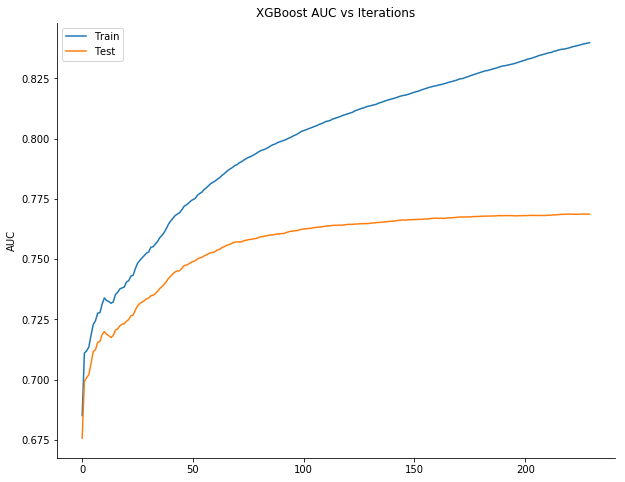

In [36]:
draw_plot(clf)

In [ ]:
# Iteration 3

In [42]:
params['min_child_weight'] = 5

In [43]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 230,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [39]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [40]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.685095	validation_1-auc:0.675761
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.711011	validation_1-auc:0.699309
[2]	validation_0-auc:0.711926	validation_1-auc:0.700781
[3]	validation_0-auc:0.713497	validation_1-auc:0.702058
[4]	validation_0-auc:0.718446	validation_1-auc:0.70674
[5]	validation_0-auc:0.722873	validation_1-auc:0.711662
[6]	validation_0-auc:0.724452	validation_1-auc:0.712413
[7]	validation_0-auc:0.727587	validation_1-auc:0.715501
[8]	validation_0-auc:0.727763	validation_1-auc:0.715789
[9]	validation_0-auc:0.731299	validation_1-auc:0.718678
[10]	validation_0-auc:0.733895	validation_1-auc:0.719909
[11]	validation_0-auc:0.732813	validation_1-auc:0.718841
[12]	validation_0-auc:0.732406	validation_1-auc:0.718202
[13]	validation_0-auc:0.731668	validation_1-auc:0.717481
[14]	validation_0-auc:0.732193	validation_1-auc:0.718251

[142]	validation_0-auc:0.816137	validation_1-auc:0.765849
[143]	validation_0-auc:0.816341	validation_1-auc:0.765922
[144]	validation_0-auc:0.816584	validation_1-auc:0.766102
[145]	validation_0-auc:0.816815	validation_1-auc:0.766037
[146]	validation_0-auc:0.817118	validation_1-auc:0.765951
[147]	validation_0-auc:0.817347	validation_1-auc:0.766044
[148]	validation_0-auc:0.817623	validation_1-auc:0.766086
[149]	validation_0-auc:0.817943	validation_1-auc:0.766162
[150]	validation_0-auc:0.81827	validation_1-auc:0.766167
[151]	validation_0-auc:0.818468	validation_1-auc:0.766179
[152]	validation_0-auc:0.818727	validation_1-auc:0.766162
[153]	validation_0-auc:0.81915	validation_1-auc:0.766142
[154]	validation_0-auc:0.819418	validation_1-auc:0.766191
[155]	validation_0-auc:0.819666	validation_1-auc:0.766337
[156]	validation_0-auc:0.819812	validation_1-auc:0.766353
[157]	validation_0-auc:0.82009	validation_1-auc:0.766437
[158]	validation_0-auc:0.82037	validation_1-auc:0.766475
[159]	validation_0

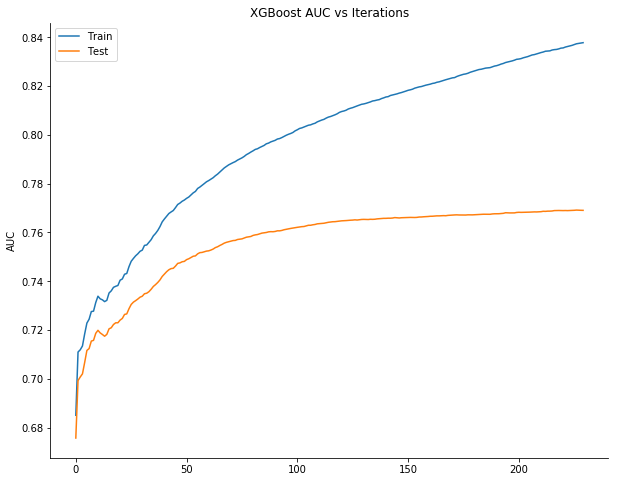

In [41]:
draw_plot(clf)

In [ ]:
# Iteration 4

In [44]:
params['min_child_weight'] = 20

In [45]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 230,
 'min_child_weight': 20,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [46]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [47]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.685095	validation_1-auc:0.675761
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.710671	validation_1-auc:0.699218
[2]	validation_0-auc:0.709882	validation_1-auc:0.69971
[3]	validation_0-auc:0.712915	validation_1-auc:0.702481
[4]	validation_0-auc:0.718282	validation_1-auc:0.707525
[5]	validation_0-auc:0.721352	validation_1-auc:0.709053
[6]	validation_0-auc:0.723439	validation_1-auc:0.711824
[7]	validation_0-auc:0.724232	validation_1-auc:0.712527
[8]	validation_0-auc:0.725143	validation_1-auc:0.713699
[9]	validation_0-auc:0.728321	validation_1-auc:0.716008
[10]	validation_0-auc:0.731659	validation_1-auc:0.718215
[11]	validation_0-auc:0.730914	validation_1-auc:0.717459
[12]	validation_0-auc:0.73139	validation_1-auc:0.718012
[13]	validation_0-auc:0.731087	validation_1-auc:0.717508
[14]	validation_0-auc:0.731223	validation_1-auc:0.717648


[141]	validation_0-auc:0.813463	validation_1-auc:0.765995
[142]	validation_0-auc:0.81364	validation_1-auc:0.766069
[143]	validation_0-auc:0.813829	validation_1-auc:0.766048
[144]	validation_0-auc:0.814169	validation_1-auc:0.766185
[145]	validation_0-auc:0.814465	validation_1-auc:0.766095
[146]	validation_0-auc:0.814635	validation_1-auc:0.766242
[147]	validation_0-auc:0.814727	validation_1-auc:0.766324
[148]	validation_0-auc:0.814984	validation_1-auc:0.766333
[149]	validation_0-auc:0.815324	validation_1-auc:0.766389
[150]	validation_0-auc:0.815554	validation_1-auc:0.766409
[151]	validation_0-auc:0.815649	validation_1-auc:0.76643
[152]	validation_0-auc:0.81593	validation_1-auc:0.766453
[153]	validation_0-auc:0.816104	validation_1-auc:0.766508
[154]	validation_0-auc:0.816374	validation_1-auc:0.76662
[155]	validation_0-auc:0.816541	validation_1-auc:0.766649
[156]	validation_0-auc:0.816728	validation_1-auc:0.766792
[157]	validation_0-auc:0.817117	validation_1-auc:0.76689
[158]	validation_0-

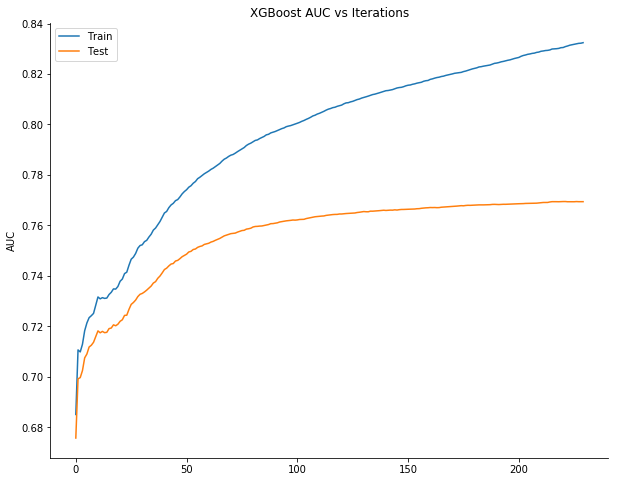

In [49]:
draw_plot(clf)

In [41]:
params['n_estimators'] = 230

In [ ]:
# Iteration 5

In [57]:
params['reg_alpha'] = 100

In [58]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 100,
 'n_estimators': 230,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [59]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [60]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.575458	validation_1-auc:0.572325
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.57779	validation_1-auc:0.575429
[2]	validation_0-auc:0.612206	validation_1-auc:0.608053
[3]	validation_0-auc:0.621448	validation_1-auc:0.616475
[4]	validation_0-auc:0.644729	validation_1-auc:0.637869
[5]	validation_0-auc:0.647386	validation_1-auc:0.639214
[6]	validation_0-auc:0.657726	validation_1-auc:0.647728
[7]	validation_0-auc:0.66245	validation_1-auc:0.65267
[8]	validation_0-auc:0.680543	validation_1-auc:0.672725
[9]	validation_0-auc:0.686276	validation_1-auc:0.678123
[10]	validation_0-auc:0.691839	validation_1-auc:0.681811
[11]	validation_0-auc:0.693613	validation_1-auc:0.683554
[12]	validation_0-auc:0.708639	validation_1-auc:0.69826
[13]	validation_0-auc:0.708871	validation_1-auc:0.698388
[14]	validation_0-auc:0.709034	validation_1-auc:0.698458
[1

[141]	validation_0-auc:0.785221	validation_1-auc:0.761904
[142]	validation_0-auc:0.785286	validation_1-auc:0.762008
[143]	validation_0-auc:0.785324	validation_1-auc:0.762047
[144]	validation_0-auc:0.785467	validation_1-auc:0.762155
[145]	validation_0-auc:0.785587	validation_1-auc:0.762241
[146]	validation_0-auc:0.785669	validation_1-auc:0.762268
[147]	validation_0-auc:0.785844	validation_1-auc:0.762392
[148]	validation_0-auc:0.785948	validation_1-auc:0.762455
[149]	validation_0-auc:0.786039	validation_1-auc:0.762552
[150]	validation_0-auc:0.786105	validation_1-auc:0.762593
[151]	validation_0-auc:0.786185	validation_1-auc:0.762619
[152]	validation_0-auc:0.78631	validation_1-auc:0.762727
[153]	validation_0-auc:0.786472	validation_1-auc:0.762774
[154]	validation_0-auc:0.786633	validation_1-auc:0.762832
[155]	validation_0-auc:0.786747	validation_1-auc:0.762896
[156]	validation_0-auc:0.786874	validation_1-auc:0.762976
[157]	validation_0-auc:0.786933	validation_1-auc:0.763033
[158]	validatio

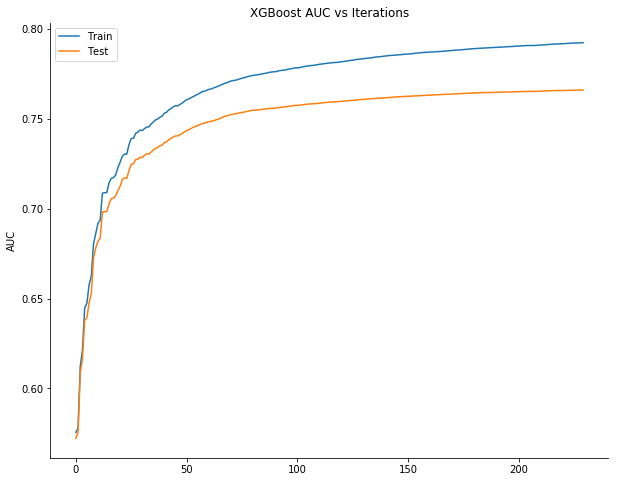

In [61]:
draw_plot(clf)

In [ ]:
# Iteration 6
# On a whole dataset

In [64]:
params['reg_alpha'] = 100

In [65]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 100,
 'n_estimators': 230,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [66]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [67]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.645813	validation_1-auc:0.641984
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.657705	validation_1-auc:0.653523
[2]	validation_0-auc:0.668075	validation_1-auc:0.665384
[3]	validation_0-auc:0.690224	validation_1-auc:0.685233
[4]	validation_0-auc:0.690501	validation_1-auc:0.685747
[5]	validation_0-auc:0.691475	validation_1-auc:0.686219
[6]	validation_0-auc:0.695228	validation_1-auc:0.688751
[7]	validation_0-auc:0.698812	validation_1-auc:0.692695
[8]	validation_0-auc:0.700894	validation_1-auc:0.695008
[9]	validation_0-auc:0.701836	validation_1-auc:0.696173
[10]	validation_0-auc:0.706276	validation_1-auc:0.700186
[11]	validation_0-auc:0.706355	validation_1-auc:0.701173
[12]	validation_0-auc:0.709257	validation_1-auc:0.703169
[13]	validation_0-auc:0.711097	validation_1-auc:0.705397
[14]	validation_0-auc:0.71163	validation_1-auc:0.705903

[141]	validation_0-auc:0.780007	validation_1-auc:0.767063
[142]	validation_0-auc:0.780161	validation_1-auc:0.767139
[143]	validation_0-auc:0.780249	validation_1-auc:0.767174
[144]	validation_0-auc:0.780371	validation_1-auc:0.767252
[145]	validation_0-auc:0.78051	validation_1-auc:0.767385
[146]	validation_0-auc:0.780659	validation_1-auc:0.767544
[147]	validation_0-auc:0.780791	validation_1-auc:0.767606
[148]	validation_0-auc:0.780927	validation_1-auc:0.767676
[149]	validation_0-auc:0.78099	validation_1-auc:0.76772
[150]	validation_0-auc:0.781071	validation_1-auc:0.767764
[151]	validation_0-auc:0.781169	validation_1-auc:0.767813
[152]	validation_0-auc:0.781269	validation_1-auc:0.767876
[153]	validation_0-auc:0.781382	validation_1-auc:0.767993
[154]	validation_0-auc:0.781482	validation_1-auc:0.768067
[155]	validation_0-auc:0.781529	validation_1-auc:0.7681
[156]	validation_0-auc:0.781606	validation_1-auc:0.768161
[157]	validation_0-auc:0.781683	validation_1-auc:0.768217
[158]	validation_0-

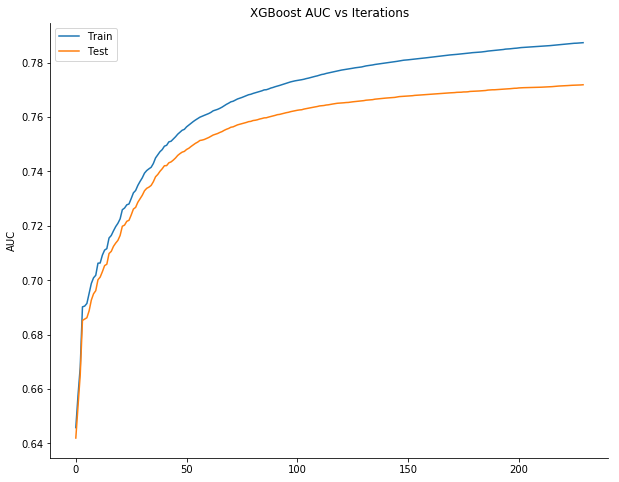

In [69]:
draw_plot(clf)

In [82]:
# Iteration 7
# On a whole dataset

In [95]:
params['reg_alpha'] = 50
params['gamma'] = 5
params['n_estimators'] = 1000
params['learning_rate'] = 0.02

In [96]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 50,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.02,
 'gamma': 5,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [97]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [99]:
clf = fitmodel(model=clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

[0]	validation_0-auc:0.656715	validation_1-auc:0.655182
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.667711	validation_1-auc:0.664844
[2]	validation_0-auc:0.669227	validation_1-auc:0.666331
[3]	validation_0-auc:0.692556	validation_1-auc:0.688137
[4]	validation_0-auc:0.69257	validation_1-auc:0.68794
[5]	validation_0-auc:0.69197	validation_1-auc:0.687253
[6]	validation_0-auc:0.699046	validation_1-auc:0.694155
[7]	validation_0-auc:0.702511	validation_1-auc:0.697457
[8]	validation_0-auc:0.701979	validation_1-auc:0.697067
[9]	validation_0-auc:0.702256	validation_1-auc:0.697366
[10]	validation_0-auc:0.702475	validation_1-auc:0.69743
[11]	validation_0-auc:0.703325	validation_1-auc:0.698339
[12]	validation_0-auc:0.704025	validation_1-auc:0.698492
[13]	validation_0-auc:0.704021	validation_1-auc:0.698487
[14]	validation_0-auc:0.703296	validation_1-auc:0.698329
[1

[141]	validation_0-auc:0.737744	validation_1-auc:0.731402
[142]	validation_0-auc:0.737798	validation_1-auc:0.731468
[143]	validation_0-auc:0.738142	validation_1-auc:0.731729
[144]	validation_0-auc:0.738654	validation_1-auc:0.732249
[145]	validation_0-auc:0.738892	validation_1-auc:0.732487
[146]	validation_0-auc:0.73898	validation_1-auc:0.732583
[147]	validation_0-auc:0.739118	validation_1-auc:0.73271
[148]	validation_0-auc:0.739304	validation_1-auc:0.732913
[149]	validation_0-auc:0.73943	validation_1-auc:0.733021
[150]	validation_0-auc:0.739656	validation_1-auc:0.733196
[151]	validation_0-auc:0.740072	validation_1-auc:0.733568
[152]	validation_0-auc:0.740275	validation_1-auc:0.733753
[153]	validation_0-auc:0.740503	validation_1-auc:0.733967
[154]	validation_0-auc:0.74096	validation_1-auc:0.734388
[155]	validation_0-auc:0.741353	validation_1-auc:0.734768
[156]	validation_0-auc:0.741613	validation_1-auc:0.735
[157]	validation_0-auc:0.741812	validation_1-auc:0.735201
[158]	validation_0-au

[284]	validation_0-auc:0.761918	validation_1-auc:0.753281
[285]	validation_0-auc:0.762025	validation_1-auc:0.753383
[286]	validation_0-auc:0.762121	validation_1-auc:0.753463
[287]	validation_0-auc:0.762202	validation_1-auc:0.75352
[288]	validation_0-auc:0.762337	validation_1-auc:0.753657
[289]	validation_0-auc:0.762484	validation_1-auc:0.753789
[290]	validation_0-auc:0.762538	validation_1-auc:0.753849
[291]	validation_0-auc:0.762662	validation_1-auc:0.75397
[292]	validation_0-auc:0.762718	validation_1-auc:0.754023
[293]	validation_0-auc:0.762877	validation_1-auc:0.754161
[294]	validation_0-auc:0.762962	validation_1-auc:0.754223
[295]	validation_0-auc:0.763013	validation_1-auc:0.754291
[296]	validation_0-auc:0.763095	validation_1-auc:0.754363
[297]	validation_0-auc:0.763247	validation_1-auc:0.754492
[298]	validation_0-auc:0.763353	validation_1-auc:0.754599
[299]	validation_0-auc:0.763444	validation_1-auc:0.754671
[300]	validation_0-auc:0.763564	validation_1-auc:0.754783
[301]	validation

[426]	validation_0-auc:0.77275	validation_1-auc:0.762193
[427]	validation_0-auc:0.772833	validation_1-auc:0.762245
[428]	validation_0-auc:0.772892	validation_1-auc:0.762282
[429]	validation_0-auc:0.77292	validation_1-auc:0.762311
[430]	validation_0-auc:0.772982	validation_1-auc:0.762357
[431]	validation_0-auc:0.773026	validation_1-auc:0.762396
[432]	validation_0-auc:0.773074	validation_1-auc:0.762442
[433]	validation_0-auc:0.773117	validation_1-auc:0.76247
[434]	validation_0-auc:0.773166	validation_1-auc:0.762516
[435]	validation_0-auc:0.773237	validation_1-auc:0.762567
[436]	validation_0-auc:0.773323	validation_1-auc:0.762641
[437]	validation_0-auc:0.773383	validation_1-auc:0.762671
[438]	validation_0-auc:0.773418	validation_1-auc:0.762689
[439]	validation_0-auc:0.773478	validation_1-auc:0.762741
[440]	validation_0-auc:0.773548	validation_1-auc:0.762801
[441]	validation_0-auc:0.773597	validation_1-auc:0.762822
[442]	validation_0-auc:0.773634	validation_1-auc:0.762848
[443]	validation_

[568]	validation_0-auc:0.779137	validation_1-auc:0.766936
[569]	validation_0-auc:0.779183	validation_1-auc:0.766981
[570]	validation_0-auc:0.779197	validation_1-auc:0.766998
[571]	validation_0-auc:0.779256	validation_1-auc:0.767022
[572]	validation_0-auc:0.779293	validation_1-auc:0.767052
[573]	validation_0-auc:0.779332	validation_1-auc:0.767092
[574]	validation_0-auc:0.779349	validation_1-auc:0.7671
[575]	validation_0-auc:0.779385	validation_1-auc:0.767124
[576]	validation_0-auc:0.779434	validation_1-auc:0.767166
[577]	validation_0-auc:0.779467	validation_1-auc:0.767194
[578]	validation_0-auc:0.779517	validation_1-auc:0.767224
[579]	validation_0-auc:0.779549	validation_1-auc:0.767258
[580]	validation_0-auc:0.779587	validation_1-auc:0.767296
[581]	validation_0-auc:0.779615	validation_1-auc:0.767323
[582]	validation_0-auc:0.779661	validation_1-auc:0.767367
[583]	validation_0-auc:0.77971	validation_1-auc:0.767397
[584]	validation_0-auc:0.779733	validation_1-auc:0.767392
[585]	validation_

[710]	validation_0-auc:0.783488	validation_1-auc:0.769911
[711]	validation_0-auc:0.783515	validation_1-auc:0.769932
[712]	validation_0-auc:0.783536	validation_1-auc:0.769951
[713]	validation_0-auc:0.783563	validation_1-auc:0.76997
[714]	validation_0-auc:0.783586	validation_1-auc:0.769979
[715]	validation_0-auc:0.78361	validation_1-auc:0.769995
[716]	validation_0-auc:0.783642	validation_1-auc:0.770024
[717]	validation_0-auc:0.783674	validation_1-auc:0.77005
[718]	validation_0-auc:0.783702	validation_1-auc:0.770079
[719]	validation_0-auc:0.783736	validation_1-auc:0.770108
[720]	validation_0-auc:0.783763	validation_1-auc:0.770131
[721]	validation_0-auc:0.783792	validation_1-auc:0.770159
[722]	validation_0-auc:0.783806	validation_1-auc:0.770161
[723]	validation_0-auc:0.783835	validation_1-auc:0.770171
[724]	validation_0-auc:0.783856	validation_1-auc:0.77019
[725]	validation_0-auc:0.783892	validation_1-auc:0.770221
[726]	validation_0-auc:0.783914	validation_1-auc:0.770227
[727]	validation_0

[852]	validation_0-auc:0.786751	validation_1-auc:0.772054
[853]	validation_0-auc:0.786762	validation_1-auc:0.772064
[854]	validation_0-auc:0.78678	validation_1-auc:0.772085
[855]	validation_0-auc:0.786821	validation_1-auc:0.772103
[856]	validation_0-auc:0.786837	validation_1-auc:0.772118
[857]	validation_0-auc:0.786858	validation_1-auc:0.772125
[858]	validation_0-auc:0.786878	validation_1-auc:0.772157
[859]	validation_0-auc:0.786891	validation_1-auc:0.772157
[860]	validation_0-auc:0.786912	validation_1-auc:0.772172
[861]	validation_0-auc:0.786941	validation_1-auc:0.772187
[862]	validation_0-auc:0.786968	validation_1-auc:0.772209
[863]	validation_0-auc:0.786985	validation_1-auc:0.772216
[864]	validation_0-auc:0.787	validation_1-auc:0.772226
[865]	validation_0-auc:0.787021	validation_1-auc:0.772237
[866]	validation_0-auc:0.78704	validation_1-auc:0.772244
[867]	validation_0-auc:0.787063	validation_1-auc:0.772252
[868]	validation_0-auc:0.787079	validation_1-auc:0.772256
[869]	validation_0-

[994]	validation_0-auc:0.789375	validation_1-auc:0.773567
[995]	validation_0-auc:0.789388	validation_1-auc:0.773576
[996]	validation_0-auc:0.789408	validation_1-auc:0.773583
[997]	validation_0-auc:0.78943	validation_1-auc:0.773613
[998]	validation_0-auc:0.789444	validation_1-auc:0.773618
[999]	validation_0-auc:0.789456	validation_1-auc:0.773623
Computation took 2180 sec.


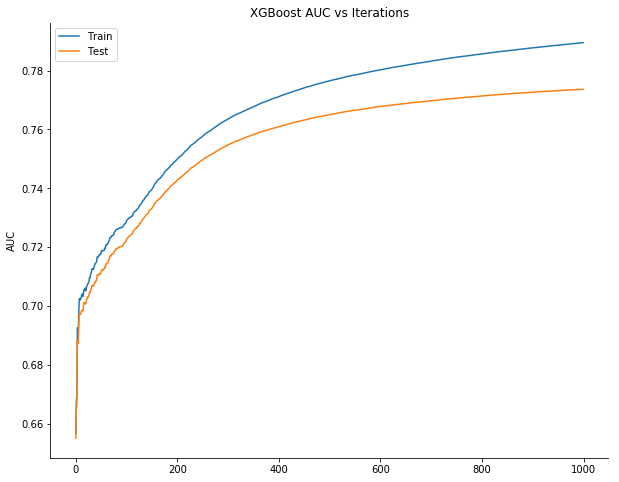

In [101]:
draw_plot(clf)

In [ ]:
# Grid Search

In [41]:
params['n_estimators'] = 230

In [50]:
params

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 230,
 'min_child_weight': 20,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8,
 'scale_pos_weight': 1}

In [51]:
clf = xgb.XGBClassifier(silent=False, **params, n_jobs=-1)

In [52]:
param_i1 = {
 'reg_alpha' : [0.1, 1, 100],
}

In [53]:
gsearch1 = GridSearchCV(estimator = clf, 
 param_grid = param_i1, scoring='roc_auc',n_jobs=-1, iid=False, cv=3)

In [55]:
gsearch1.fit(X_train, y_train)

In [ ]:
gsearch1.grid_scores_

In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [ ]:
#Save trained model
pickle.dump(gsearch1, open('../data/results/gsearch1.dat', 'wb'))

#### Evaluation

In [74]:
predictions = clf.predict_proba(dtest[predictors])

In [75]:
predictions

array([[0.9268614 , 0.07313859],
       [0.8878446 , 0.11215537],
       [0.9824166 , 0.01758337],
       ...,
       [0.934134  , 0.06586602],
       [0.93702483, 0.0629752 ],
       [0.6050522 , 0.39494783]], dtype=float32)

In [76]:
pickle.dump(predictions, open('../data/results/predictions.pkl', 'wb'))

In [77]:
### Prepare submission to Kaggle

In [78]:
submission =  pd.read_csv('../data/sample_submission.csv')

In [79]:
submission['TARGET'] = predictions[:,1]

In [80]:
submission.to_csv('../data/submission.csv', index=False)